58.1975931464%
768


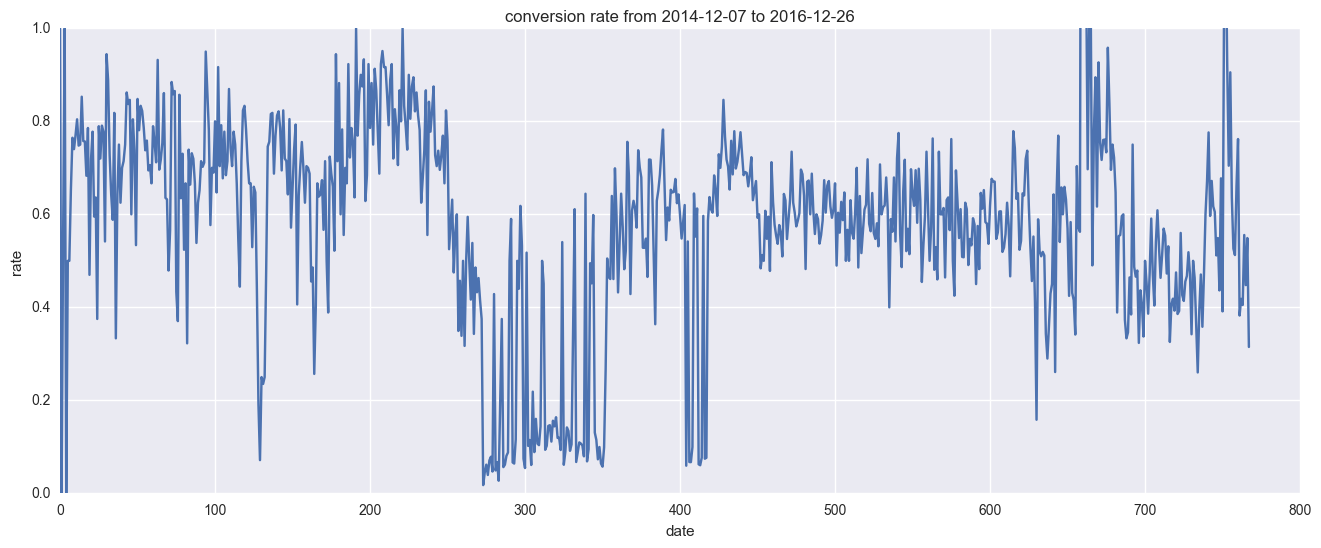

In [4]:
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

raw_data = []
with open('/Users/zuoyangxu/Downloads/data/user_conversion.txt', 'r') as file:
    for item in file.readlines():
        raw_data.append(eval(item.split(':')[1].replace('\n', '')))

data = []
for item in raw_data:
    if item[0]==0:
        continue
    else:
        # 第二天的转化率和第三十天的转化率
        data.append(item[1]/item[0])

plt.figure(figsize=(16, 6))
plt.ylabel('rate')
plt.xlabel('date')
plt.ylim(0, 1)
plt.title('conversion rate from 2014-12-07 to 2017-01-15')
plt.plot(data)

print(('转化率均值：%s%%') % (np.mean(data)*100))

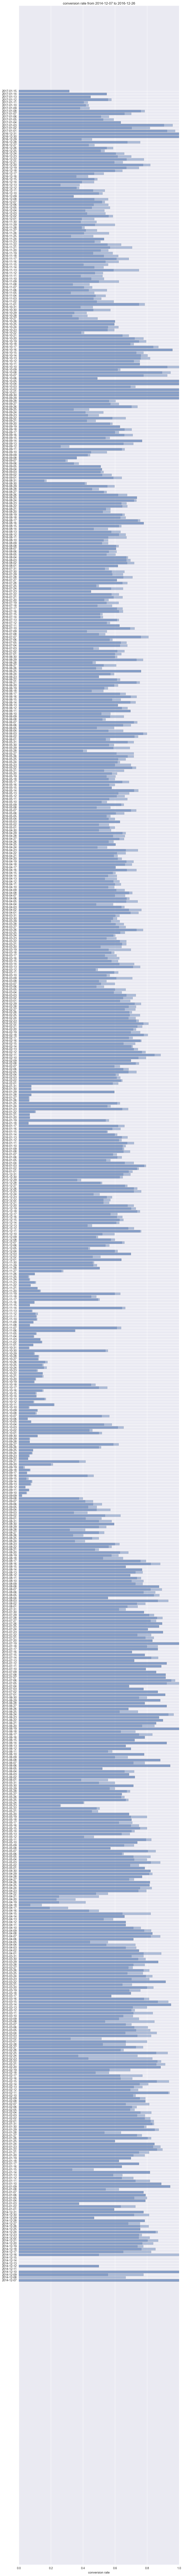

In [59]:
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

raw_data = []
with open('/Users/zuoyangxu/Downloads/data/user_conversion.txt', 'r') as file:
    for item in file.readlines():
        raw_data.append(eval(item.split(':')[1].replace('\n', '')))

data = []
for item in raw_data:
    if item[0]==0:
        data.append([0, 0])
    else:
        # 第二天的转化率和第三十天的转化率
        data.append([item[1]/item[0], item[-1]/item[0]])
data = zip(*data)
        
start = datetime.date(2014, 12, 7)
end = datetime.date(2017, 1, 15)
dates = []
for i in range((end - start).days + 1):
    dates.append((start + datetime.timedelta(days=i)).strftime('%Y-%m-%d'))
        
sns.set(style="darkgrid")
y_pos = np.arange(len(dates))

plt.figure(figsize=(10, 160))
for item in data:
    plt.barh(y_pos, item, align='center', alpha=0.4)
plt.yticks(y_pos, dates)
plt.xlim(0, 1)
plt.xlabel('conversion rate')
plt.title('conversion rate compare after 1 day and 30 days')

plt.show()

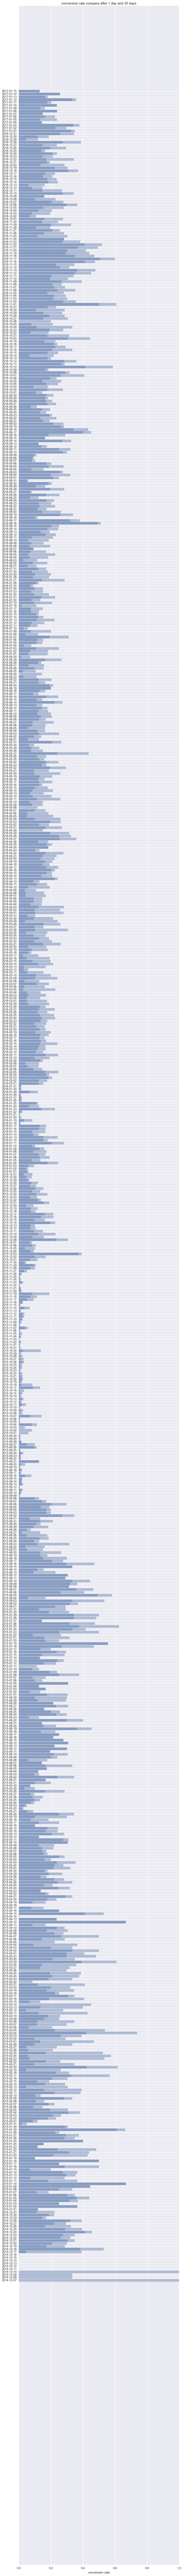

In [9]:
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

raw_data = []
with open('/Users/zuoyangxu/Downloads/data/user_conversion.txt', 'r') as file:
    for item in file.readlines():
        raw_data.append(eval(item.split(':')[1].replace('\n', '')))
base = [item[0] for item in raw_data]

raw_data = []
with open('/Users/zuoyangxu/Downloads/data/user_invest.txt', 'r') as file:
    for item in file.readlines():
        raw_data.append(eval(item.split(':')[1].replace('\n', '')))
        
data = []
for i, item in enumerate(raw_data):
    if base[i]==0:
        data.append([0, 0])
    else:
        # 第二天的转化率和第三十天的转化率
        data.append([item[3]/base[i], item[-1]/base[i]])
data = zip(*data)
        
start = datetime.date(2014, 12, 7)
end = datetime.date(2017, 1, 15)
dates = []
for i in range((end - start).days + 1):
    dates.append((start + datetime.timedelta(days=i)).strftime('%Y-%m-%d'))
        
sns.set(style="darkgrid")
y_pos = np.arange(len(dates))

plt.figure(figsize=(10, 160))
for item in data:
    plt.barh(y_pos, item, align='center', alpha=0.4)
plt.yticks(y_pos, dates)
plt.xlim(0, 1)
plt.xlabel('conversion rate')
plt.title('conversion rate compare after 1 day and 30 days')

plt.show()

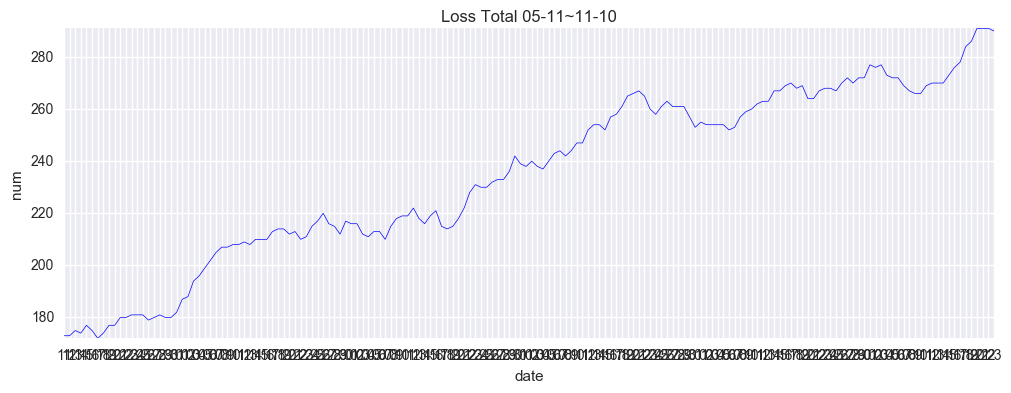

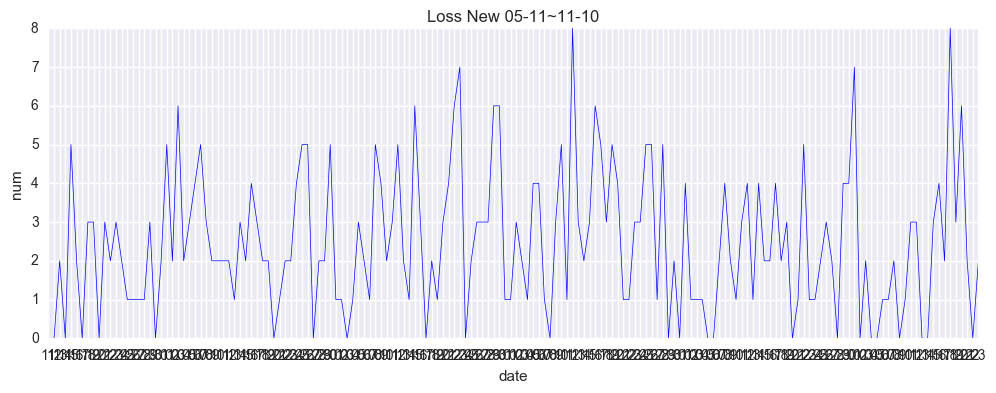

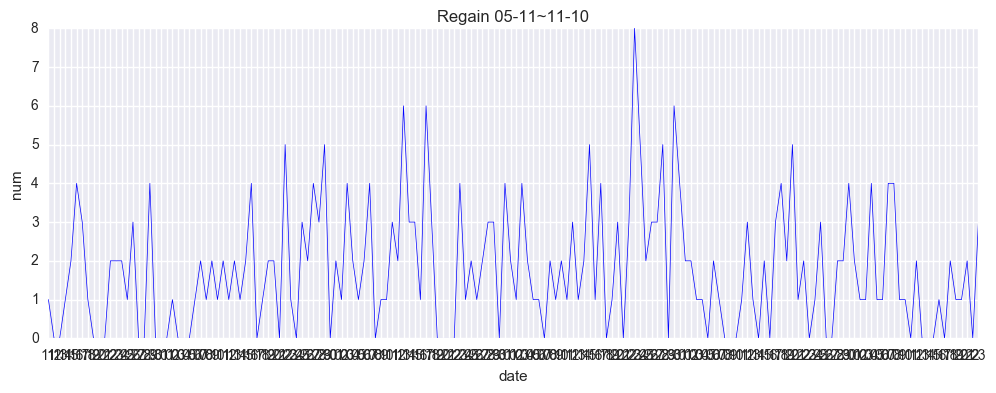

In [3]:
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

data = []
with open('/Users/zuoyangxu/Downloads/data/user_loss.txt', 'r') as file:
    for item in file.readlines():
        data.append(eval(item.split(':')[1].replace('\n', '')))

start = datetime.date(2016, 5, 11)
end = datetime.date(2016, 10, 24)
data = data[0:166]
dates = []
for i in range((end - start).days + 1):
    dates.append((start + datetime.timedelta(days=i)).strftime('%d'))
y_pos = np.arange(len(dates))
        
plt.figure(figsize=(12, 4))
# plt.subplot(131)
plt.plot([item[0] for item in data], 'b', lw=0.5)
plt.title('Loss Total 05-11~11-10')
plt.grid(True)
plt.xticks(y_pos, dates)
plt.axis('tight')
plt.xlabel('date')
plt.ylabel('num')

plt.figure(figsize=(12, 4))
#plt.subplot(132)
plt.plot([item[1] for item in data], 'b', lw=0.5)
plt.title('Loss New 05-11~11-10')
plt.grid(True)
plt.xticks(y_pos, dates)
plt.axis('tight')
plt.xlabel('date')
plt.ylabel('num')

plt.figure(figsize=(12, 4))
#plt.subplot(133)
plt.plot([item[2] for item in data], 'b', lw=0.5)
plt.title('Regain 05-11~11-10')
plt.grid(True)
plt.xticks(y_pos, dates)
plt.axis('tight')
plt.xlabel('date')
plt.ylabel('num')

plt.show()


26
26


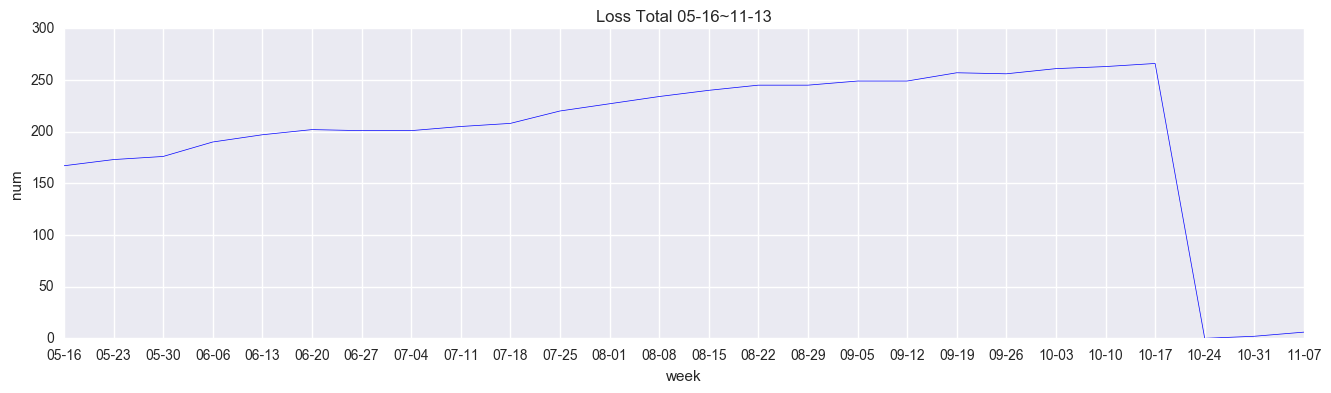

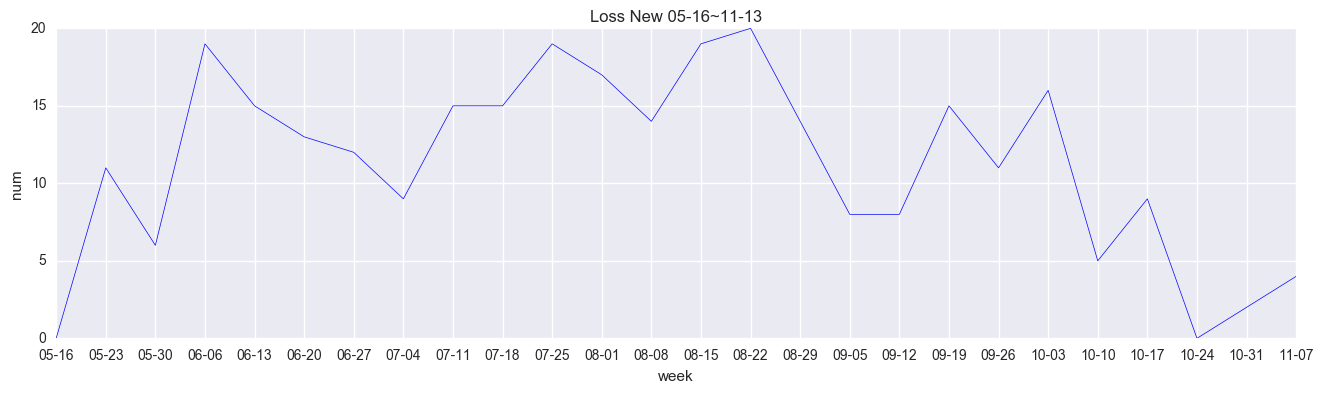

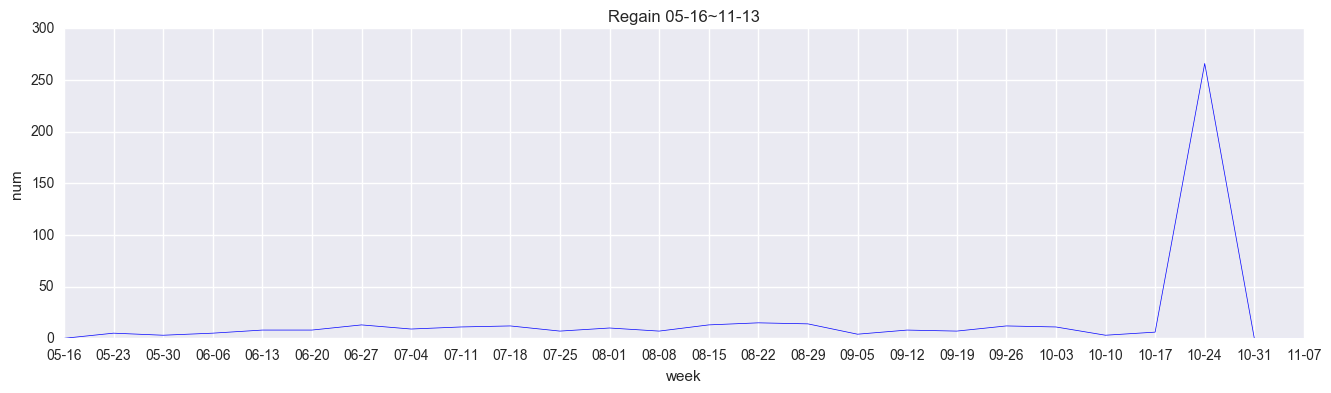

In [20]:
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

data = []
with open('/Users/zuoyangxu/Downloads/data/user_loss_per_week.txt', 'r') as file:
    for item in file.readlines():
        data.append(eval(item.split(':')[1].replace('\n', '')))

sequence = []
for index in range(len(data)):
    if index == 0:
        sequence.append([len(data[index]), 0, 0])
        continue
    item1, item2, repeat = data[index - 1], data[index], 0
    for element in item1:
        if element in item2:
            repeat += 1
    sequence.append([len(item2), len(item2) - repeat, len(item1) - repeat])
        
start = datetime.date(2016, 5, 16)
end = datetime.date(2016, 11, 13)
dates = []
for i in range((end - start).days + 1):
    dates.append((start + datetime.timedelta(days=i)).strftime('%m-%d'))
    
dates = dates[::7]
y_pos = np.arange(len(dates))
        
plt.figure(figsize=(16, 4))
# plt.subplot(131)
plt.plot([item[0] for item in sequence], 'b', lw=0.5)
plt.title('Loss Total 05-16~11-13')
plt.grid(True)
plt.xticks(y_pos, dates)
# plt.axis('tight')
plt.xlabel('week')
plt.ylabel('num')

plt.figure(figsize=(16, 4))
#plt.subplot(132)
plt.plot([item[1] for item in sequence], 'b', lw=0.5)
plt.title('Loss New 05-16~11-13')
plt.grid(True)
plt.xticks(y_pos, dates)
# plt.axis('tight')
plt.xlabel('week')
plt.ylabel('num')

plt.figure(figsize=(16, 4))
#plt.subplot(133)
plt.plot([item[2] for item in sequence], 'b', lw=0.5)
plt.title('Regain 05-16~11-13')
plt.grid(True)
plt.xticks(y_pos, dates)
# plt.axis('tight')
plt.xlabel('week')
plt.ylabel('num')

# plt.show()
print(sequence)

In [24]:
import datetime

start = datetime.date(2016, 5, 30)
end = datetime.date(2016, 11, 28)
dates = []
for i in range((end - start).days + 1):
    dates.append((start + datetime.timedelta(days=i)).strftime('%Y-%m-%d'))
    
print(len(dates))

183


In [26]:
# base = []
# with open('/Users/zuoyangxu/Downloads/data/login_user.txt', 'r') as file:
#     for item in file.readlines():
#         base.append(item.replace('\n', ''))

data = []
with open('/Users/zuoyangxu/Downloads/data/user_loss_per_week.txt', 'r') as file:
    for item in file.readlines()[:2]:
        data.append(eval(item.split(':')[1].replace('\n', '')))
        
print(data)

[[27, 179, 28, 367, 88, 158, 52, 829, 66, 51, 756, 951, 456, 1050, 1059, 1247, 226, 1260, 1264, 1409, 1485, 687, 972, 143, 872, 1598, 1692, 1726, 1728, 1880, 1790, 2021, 2102, 2207, 1944, 2444, 1982, 2711, 2805, 2958, 3034, 3058, 2691, 2961, 3342, 3147, 3407, 2944, 3638, 3622, 6496, 6570, 6745, 1791, 6873, 6207, 113, 5475, 6980, 7069, 7342, 7588, 7669, 7911, 8088, 8063, 8068, 8075, 8022, 7468, 7430, 8195, 228, 8067, 7401, 8200, 8218, 8072, 8884, 9160, 1723, 9098, 9285, 9594, 8754, 9820, 9525, 10042, 9060, 9912, 12125, 10152, 6777, 12468, 12580, 12429, 12668, 13027, 13380, 14107, 13977, 14023, 14003, 14352, 1612, 14139, 14188, 14436, 14308, 14393, 12198, 13830, 14470, 14881, 14565, 14626, 12358, 14812, 10117, 14820, 485, 14582, 14732, 15313, 9710, 15457, 15351, 15821, 15729, 15777, 21723, 43, 26805, 29026, 30838, 12559, 38406, 43413, 48778, 1033, 59971, 23711, 62819, 63456, 63761, 61902, 64424, 64455, 64466, 65048, 65533, 68566, 66224, 66227, 28358, 68802, 67649, 69254, 62944, 68711, 67

In [36]:
user_identify = []
user_invest = []
data = []
with open('/Users/zuoyangxu/Downloads/data/user_conversion.txt', 'r') as file:
    for item in file.readlines():
        user_identify.append(eval(item.split(':')[1].replace('\n', '')))

with open('/Users/zuoyangxu/Downloads/data/user_invest.txt', 'r') as file:
    for item in file.readlines():
        user_invest.append(eval(item.split(':')[1].replace('\n', '')))
        
for index, item in enumerate(user_identify[:691]):
    data.append([item[0], item[2], user_invest[index][3]])
    
for index, item in enumerate(user_identify[691:]):
    data.append([item[0], item[1], user_invest[index+691][3]])
    
for item in data:
    print(item)

[1, 1, 0]
[3, 1, 0]
[9, 5, 0]
[1, 1, 0]
[2, 0, 0]
[2, 1, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[2, 1, 0]
[23, 18, 1]
[68, 55, 26]
[331, 248, 57]
[87, 68, 18]
[46, 38, 14]
[115, 90, 30]
[112, 85, 31]
[68, 59, 28]
[66, 50, 19]
[37, 29, 6]
[41, 28, 9]
[28, 22, 9]
[83, 39, 12]
[32, 25, 6]
[18, 14, 2]
[42, 25, 5]
[11, 7, 4]
[8, 3, 2]
[19, 15, 6]
[25, 20, 9]
[43, 34, 13]
[27, 21, 3]
[24, 13, 6]
[18, 17, 8]
[9, 8, 6]
[11, 8, 2]
[14, 9, 1]
[17, 10, 5]
[11, 9, 3]
[15, 5, 1]
[14, 9, 4]
[4, 3, 1]
[8, 5, 4]
[10, 7, 1]
[14, 10, 3]
[16, 12, 5]
[29, 25, 7]
[43, 36, 5]
[13, 11, 2]
[5, 3, 2]
[46, 37, 13]
[99, 75, 29]
[163, 93, 37]
[270, 230, 165]
[3122, 2472, 898]
[990, 831, 16]
[242, 201, 21]
[117, 94, 21]
[61, 45, 13]
[58, 46, 18]
[36, 25, 7]
[34, 24, 3]
[27, 19, 5]
[19, 15, 2]
[57, 43, 16]
[59, 42, 6]
[221, 208, 49]
[102, 74, 16]
[92, 66, 4]
[73, 56, 12]
[79, 69, 9]
[96, 63, 20]
[560, 362, 182]
[48, 24, 11]
[23, 13, 1]
[26, 23, 11]
[127, 110, 12]
[89, 77, 15]
[30, 14, 2]
[54, 21, 3]
[42, 36, 7]
[52, 34, 

In [45]:
data = []
with open('/Users/zuoyangxu/Downloads/data.txt', 'r') as file:
    for item in file.readlines():
        item = item.replace('\n','').split('\t')
        data.append([int(item[0]), int(item[2]), int(item[4]), int(item[6]), int(item[8]), int(item[10])])
a = (data[0])
print(a)

[25, 1, 2, 2, 2, 1]


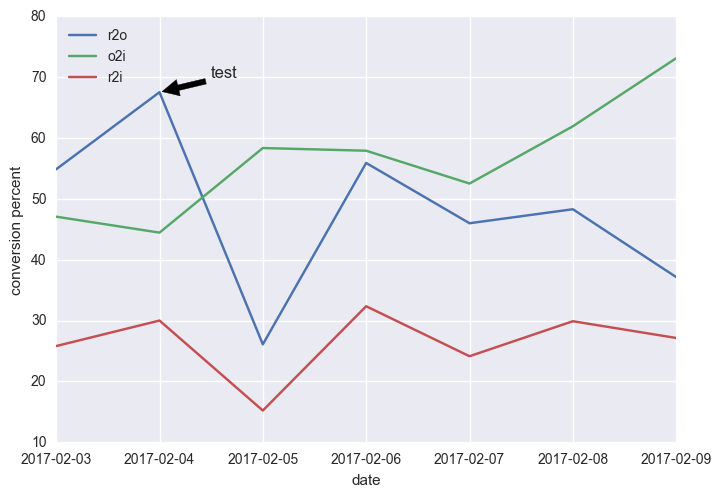

In [21]:
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

dates = []
for i in range(7):
    dates.append(datetime.date.today()+datetime.timedelta(days=-i))
data = [[54.84, 47.06, 25.81], [67.5, 44.44, 30], [26.09, 58.33, 15.22], [55.88, 57.89, 32.35], 
        [45.98, 52.5, 24.14], [48.28, 61.9, 29.89], [37.14, 73.08, 27.14]]
labels=['r2o', 'o2i', 'r2i']
for i, item in enumerate(zip(*data)):
    plt.plot(item, label=labels[i])
plt.xlabel('date')
plt.ylabel('conversion percent')
plt.legend(loc='upper left')
plt.xticks(np.arange(len(dates)), dates[::-1])
plt.annotate('test', xy=(1, 67.5), xytext=(1.5, 70), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [3]:
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

def line_plot(lines, xticks=[], title='', xlabel='', ylabel='', legends=[], save_path=''):
	"""plot one or more lines in the figure, the length of each line and xticks and legends should be the same
	"""
	if xticks:
		for line in lines:
			if len(line) != len(xticks):
				raise Exception('xticks do not match the line')
	if legends:
		if len(lines) != len(legends):
			raise Exception('legends do not match number of lines')

	plt.figure(figsize=(10, 7))
	for index, line in enumerate(lines):
		if legends:
			plt.plot(line, label=legends[index])
		else:
			plt.plot(line)
	plt.title(title)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	if xticks:
		plt.xticks(np.arange(len(xticks)), xticks)


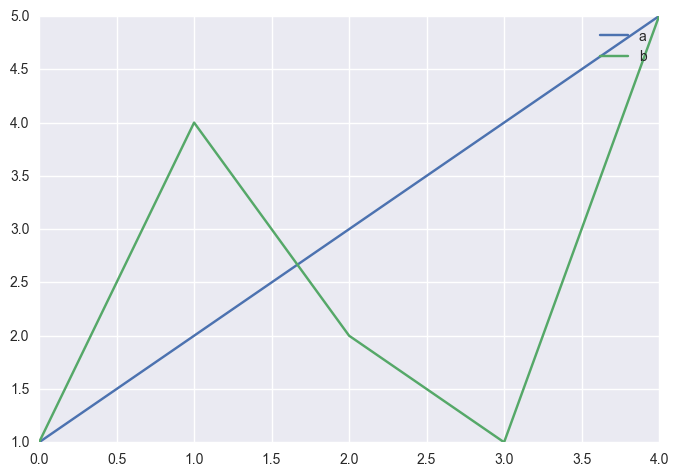

In [7]:
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

lines = [[1,2,3,4,5], [1,4,2,1,5]]
legends = ['a', 'b']
for index, line in enumerate(lines):
		if legends:
			plt.plot(line, label=legends[index])

plt.legend()
plt.show()

In [2]:
import datetime

start = datetime.date(2016, 5, 11)
end = datetime.date(2016, 10, 24)
print(end-start)

166 days, 0:00:00
